In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce


In [3]:
coupon=pd.read_excel("coupon_matrix.xlsx")
delivery=pd.read_excel("delivery_matrix.xlsx")
control=pd.read_excel("control_matrix.xlsx")


In [11]:
coupon.columns

Index(['PID', 'week_bin', 'FV_sales', 'NFV_sales', 'other_sales', 'portion',
       'transaction', 'total_coupon_used', 'total_sales', 'phase',
       'Intervention', 'CUSTOMER_ID', 'COHORT #', 'Start Date', 'End Date',
       'period_start', 'FV_out_of_pocket', 'DP_out_of_pocket '],
      dtype='object')

In [4]:
coupon["PID"].nunique()

25

In [5]:
delivery["PID"].nunique()

29

In [6]:
control["PID"].nunique()

19

create mean of outcomes for 3 arms

In [14]:
# Files and labels
files = {
    "coupon": "coupon_matrix.xlsx",
    "delivery": "delivery_matrix.xlsx",
    "control": "control_matrix.xlsx"
}

# Metrics to average
metrics = [
    'FV_sales', 'total_sales', 'portion', 'other_sales',
    'NFV_sales', 'transaction', 'FV_out_of_pocket'
]

# Dictionary to store grouped DataFrames
grouped_results = {}

for name, file in files.items():
    # Load file
    df = pd.read_excel(file)

    # Group and calculate mean
    grouped = df.groupby(
        ['week_bin', 'phase', 'Intervention'], as_index=False
    )[metrics].mean()

    # Save result
    grouped_results[name] = grouped

# Unpack if needed
grouped_coupon   = grouped_results['coupon']
grouped_delivery = grouped_results['delivery']
grouped_control  = grouped_results['control']


plot the trend for outcomes for 3 arms

In [18]:

# Outcomes to plot
outcomes = ['FV_sales', 'total_sales', 'portion', 'other_sales',
    'NFV_sales', 'transaction', 'FV_out_of_pocket' ]

# Group data (already prepared)
groups = {
    'coupon': (grouped_coupon, 'blue', 'o'),
    'delivery': (grouped_delivery, 'green', 's'),
    'control': (grouped_control, 'red', '^')
}

for outcome in outcomes:
    fig, ax1 = plt.subplots(figsize=(10, 5))

    # Plot all groups
    for label, (df, color, marker) in groups.items():
        ax1.plot(df['week_bin'], df[outcome], 
                 color=color, marker=marker, label=label)

    # Vertical lines for phase separation
    ax1.axvline(x=0, color='black', linestyle='--')
    ax1.axvline(x=26, color='black', linestyle='--')

    # Annotate phases
    ymin, ymax = ax1.get_ylim()
    ax1.text(-15, ymax * 0.95, 'Pre-Trial', ha='center', fontsize=10, color='black')
    ax1.text(11, ymax * 0.95, 'In-Trial', ha='center', fontsize=10, color='black')
    ax1.text(30, ymax * 0.95, 'Post-Trial', ha='center', fontsize=10, color='black')

    # Labels and title
    ax1.set_xlabel('Week Window')
    ax1.set_ylabel(outcome)
    ax1.set_title(f'{outcome} Trends Over Time (2–Week Windows)')

    # Grid and legend
    ax1.grid(True, linestyle='--', alpha=0.4)
    ax1.legend()

    # Layout
    fig.tight_layout()

    # Save each figure
    plt.savefig(f"{outcome}_trend.png", dpi=300)
    plt.close(fig)   # Close to avoid displaying during batch run
   


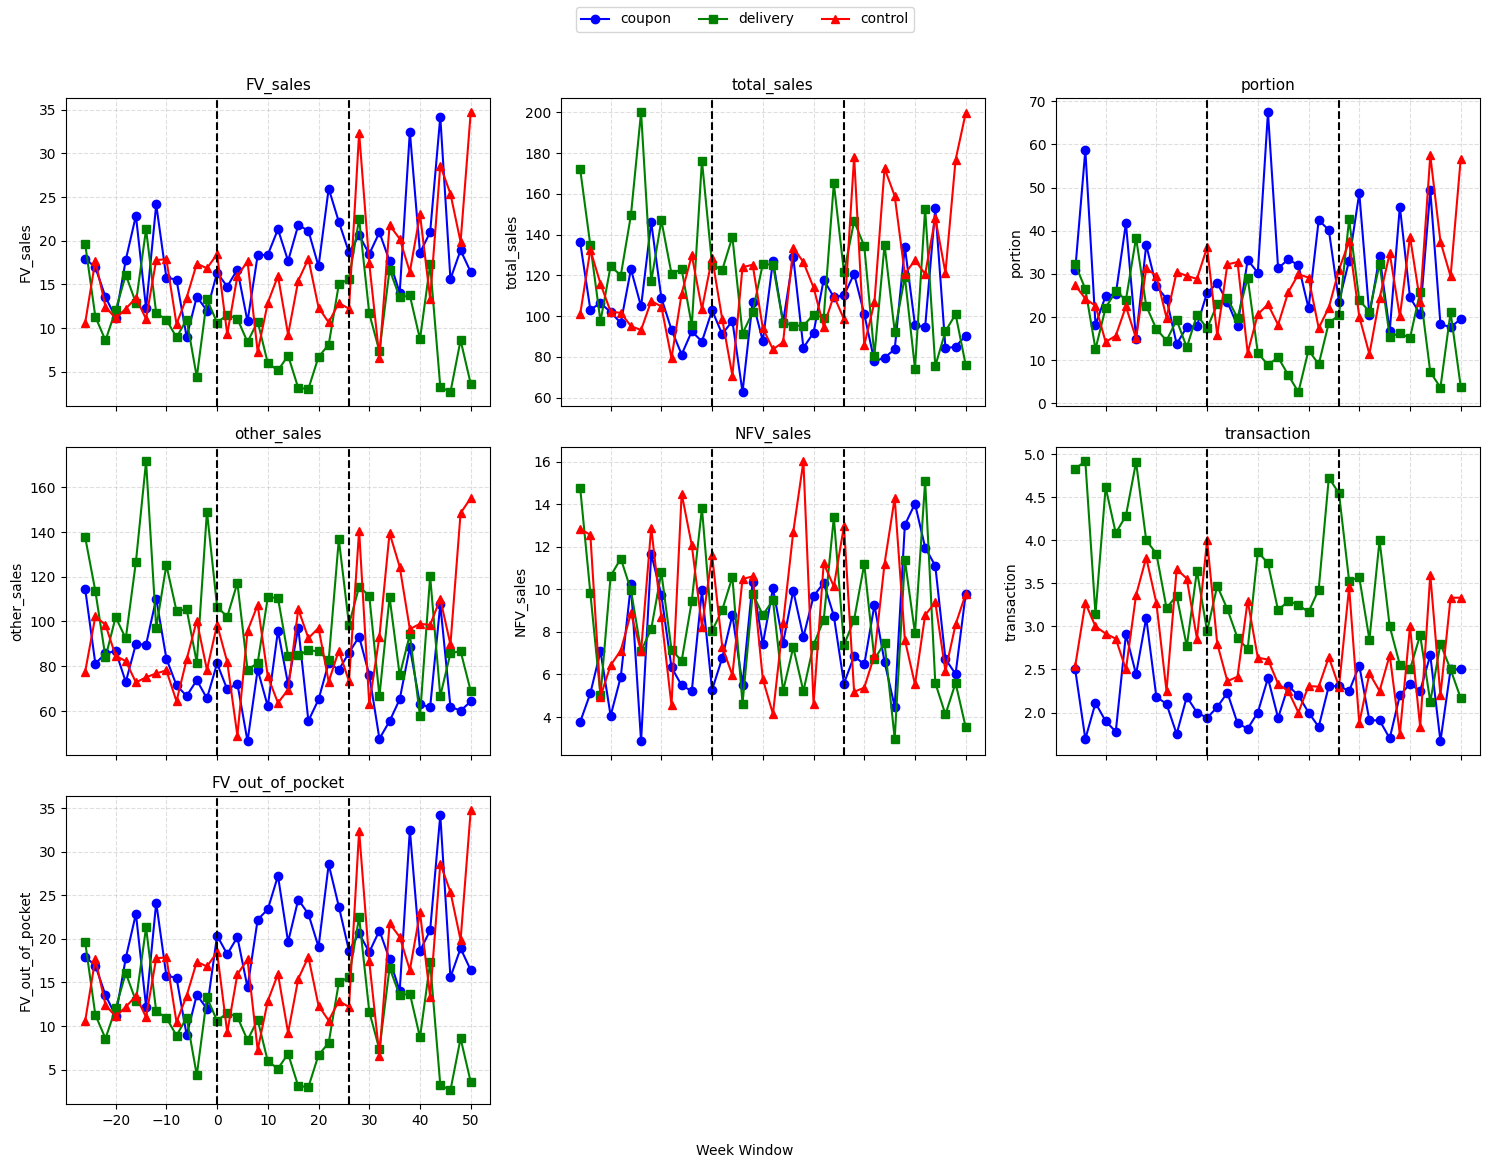

In [33]:
import matplotlib.pyplot as plt

# Outcomes to plot
outcomes = ['FV_sales', 'total_sales', 'portion', 'other_sales',
    'NFV_sales', 'transaction', 'FV_out_of_pocket' ]

# Group data (already prepared)
groups = {
    'coupon': (grouped_coupon, 'blue', 'o'),
    'delivery': (grouped_delivery, 'green', 's'),
    'control': (grouped_control, 'red', '^')
}

# Create grid of subplots
n_outcomes = len(outcomes)
n_cols = 3
n_rows = (n_outcomes + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows), sharex=True)
axes = axes.flatten()

for i, outcome in enumerate(outcomes):
    ax = axes[i]

    # Plot all groups
    for label, (df, color, marker) in groups.items():
        ax.plot(df['week_bin'], df[outcome], 
                color=color, marker=marker, label=label)

    # Vertical lines
    ax.axvline(x=0, color='black', linestyle='--')
    ax.axvline(x=26, color='black', linestyle='--')

    # Titles and labels
    ax.set_title(outcome, fontsize=11)
    ax.set_ylabel(outcome)
    ax.grid(True, linestyle='--', alpha=0.4)

# Remove unused axes if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Shared X label
fig.text(0.5, 0.04, 'Week Window', ha='center')

# Add one shared legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3)

# Layout and save
fig.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.savefig("all_outcomes_trends.png", dpi=300)
plt.show()


anomally check (pid 312)

In [25]:
# change annomal pid if necessary
control_312 = control[control['PID']==312]

compare anomal pid with group average

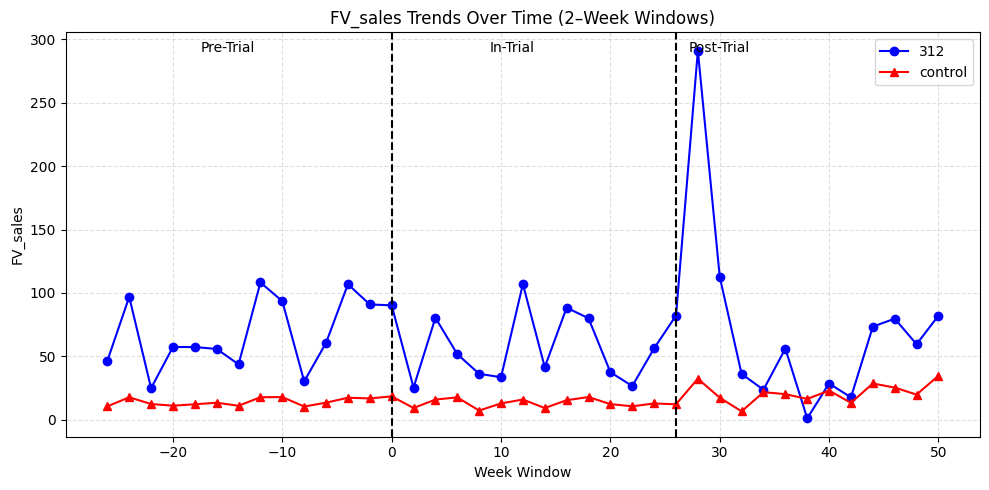

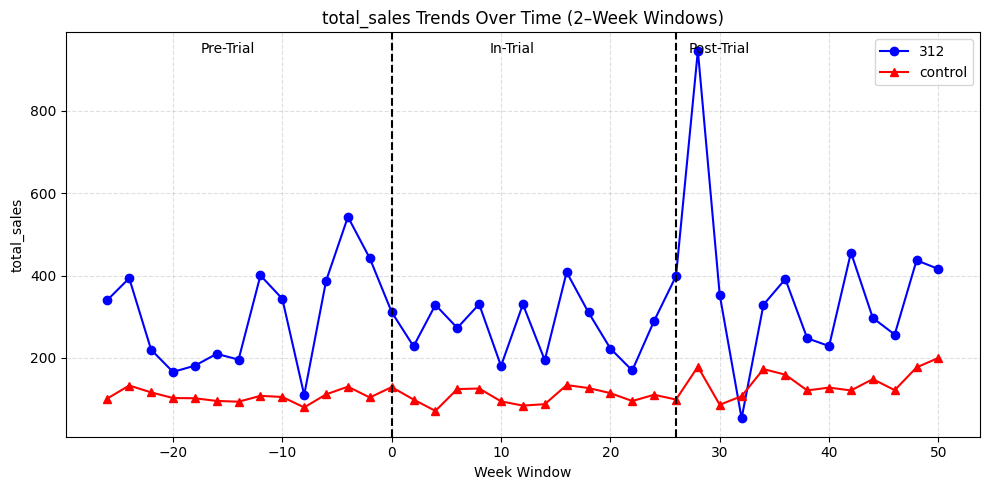

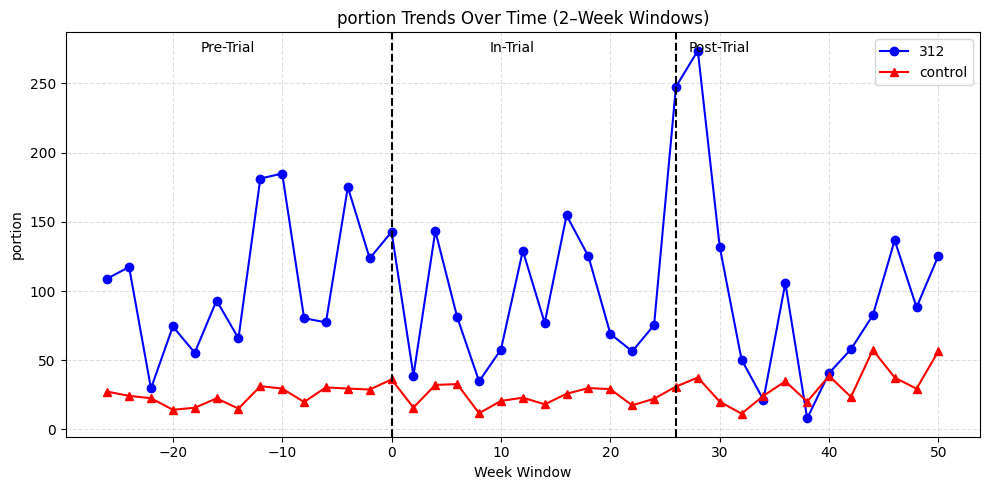

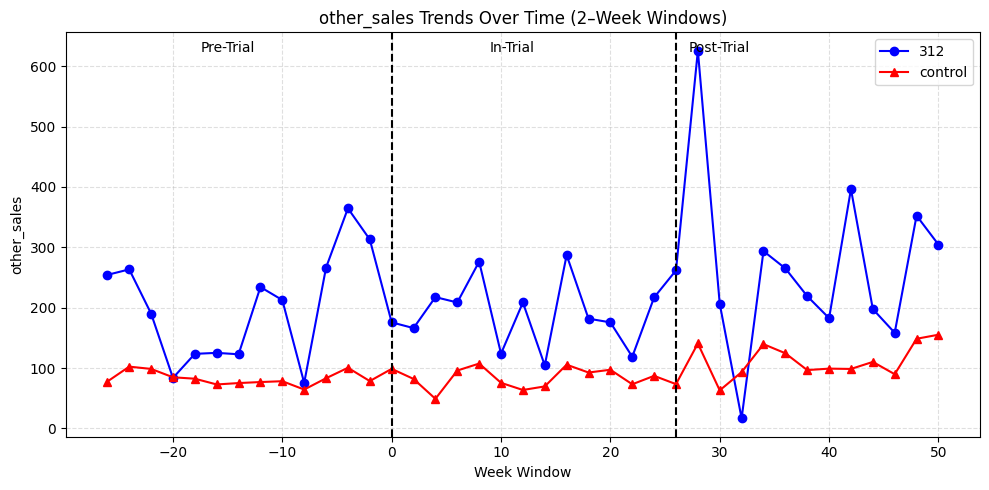

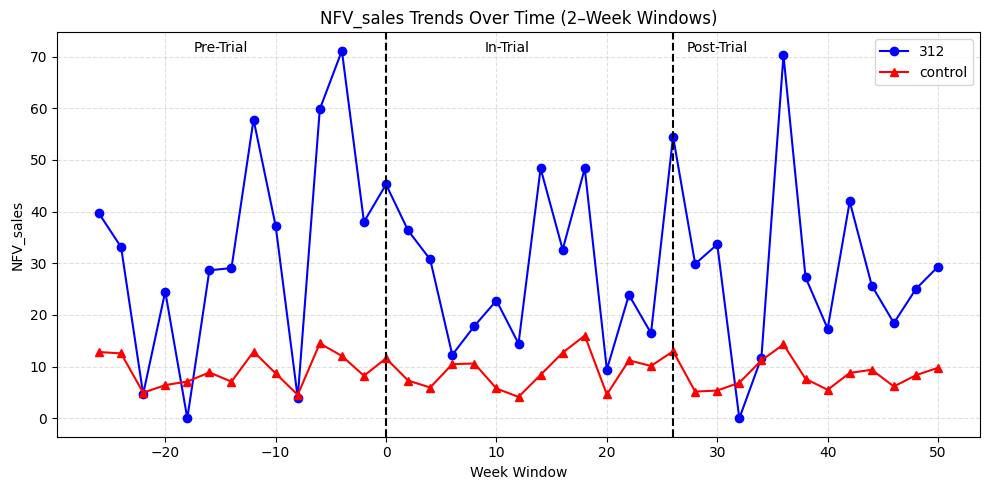

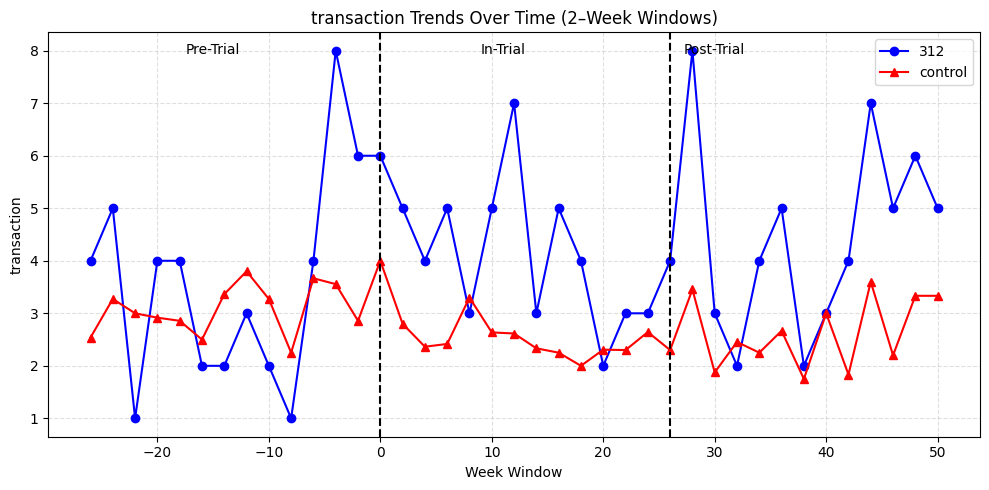

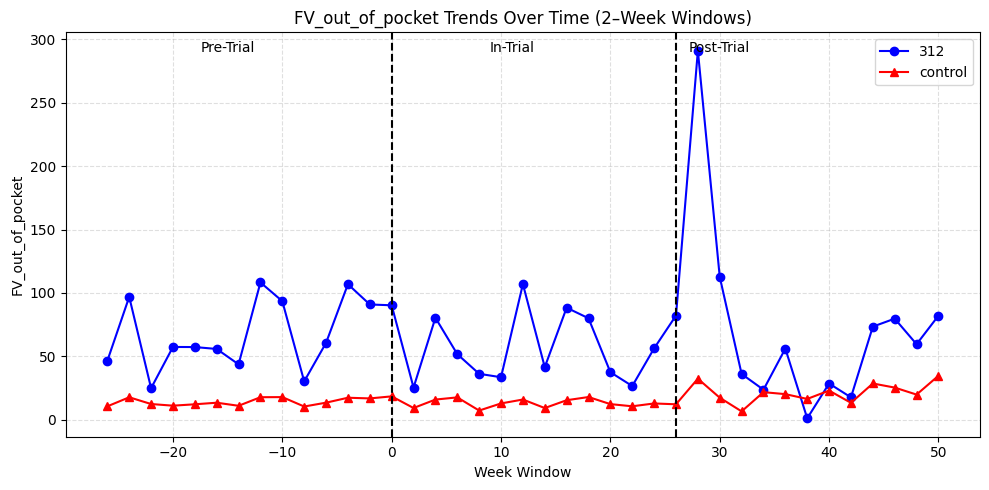

In [28]:
# Outcomes to plot
outcomes = ['FV_sales', 'total_sales', 'portion', 'other_sales',
    'NFV_sales', 'transaction', 'FV_out_of_pocket' ]

# Group data (already prepared)
groups = {
    '312': (control_312, 'blue', 'o'),    
    'control': (grouped_control, 'red', '^')
}

for outcome in outcomes:
    fig, ax1 = plt.subplots(figsize=(10, 5))

    # Plot all groups
    for label, (df, color, marker) in groups.items():
        ax1.plot(df['week_bin'], df[outcome], 
                 color=color, marker=marker, label=label)

    # Vertical lines for phase separation
    ax1.axvline(x=0, color='black', linestyle='--')
    ax1.axvline(x=26, color='black', linestyle='--')

    # Annotate phases
    ymin, ymax = ax1.get_ylim()
    ax1.text(-15, ymax * 0.95, 'Pre-Trial', ha='center', fontsize=10, color='black')
    ax1.text(11, ymax * 0.95, 'In-Trial', ha='center', fontsize=10, color='black')
    ax1.text(30, ymax * 0.95, 'Post-Trial', ha='center', fontsize=10, color='black')

    # Labels and title
    ax1.set_xlabel('Week Window')
    ax1.set_ylabel(outcome)
    ax1.set_title(f'{outcome} Trends Over Time (2–Week Windows)')

    # Grid and legend
    ax1.grid(True, linestyle='--', alpha=0.4)
    ax1.legend()

    # Layout
    fig.tight_layout()

    # Save each figure
    plt.show #Close to avoid displaying during batch run
   


sample size analysis

In [30]:

# List of variables to check
variables = ['FV_sales', 'total_sales', 'portion', 'other_sales',
    'NFV_sales', 'transaction', 'FV_out_of_pocket' ]

# Datasets
datasets = {
    'coupon': coupon,
    'delivery': delivery,
    'control': control
}

# Dictionary to store counts for each dataset
all_counts = {}

for name, df in datasets.items():
    variable_counts = {}
    
    # Loop through variables and calculate unique PID count per week_bin
    for var in variables:
        temp = df.loc[df[var].notna(), ['PID', 'week_bin']]
        count = temp.groupby('week_bin')['PID'].nunique().reset_index()
        count.columns = ['week_bin', var]
        variable_counts[var] = count
    
    # Merge all DataFrames on week_bin
    df_list = list(variable_counts.values())
    merged_counts = reduce(lambda left, right: pd.merge(left, right, on='week_bin', how='outer'), df_list)
    
    # Save into dictionary
    all_counts[name] = merged_counts

# Access results
coupon_counts   = all_counts['coupon']
delivery_counts = all_counts['delivery']
control_counts  = all_counts['control']


plots trend for sample size change

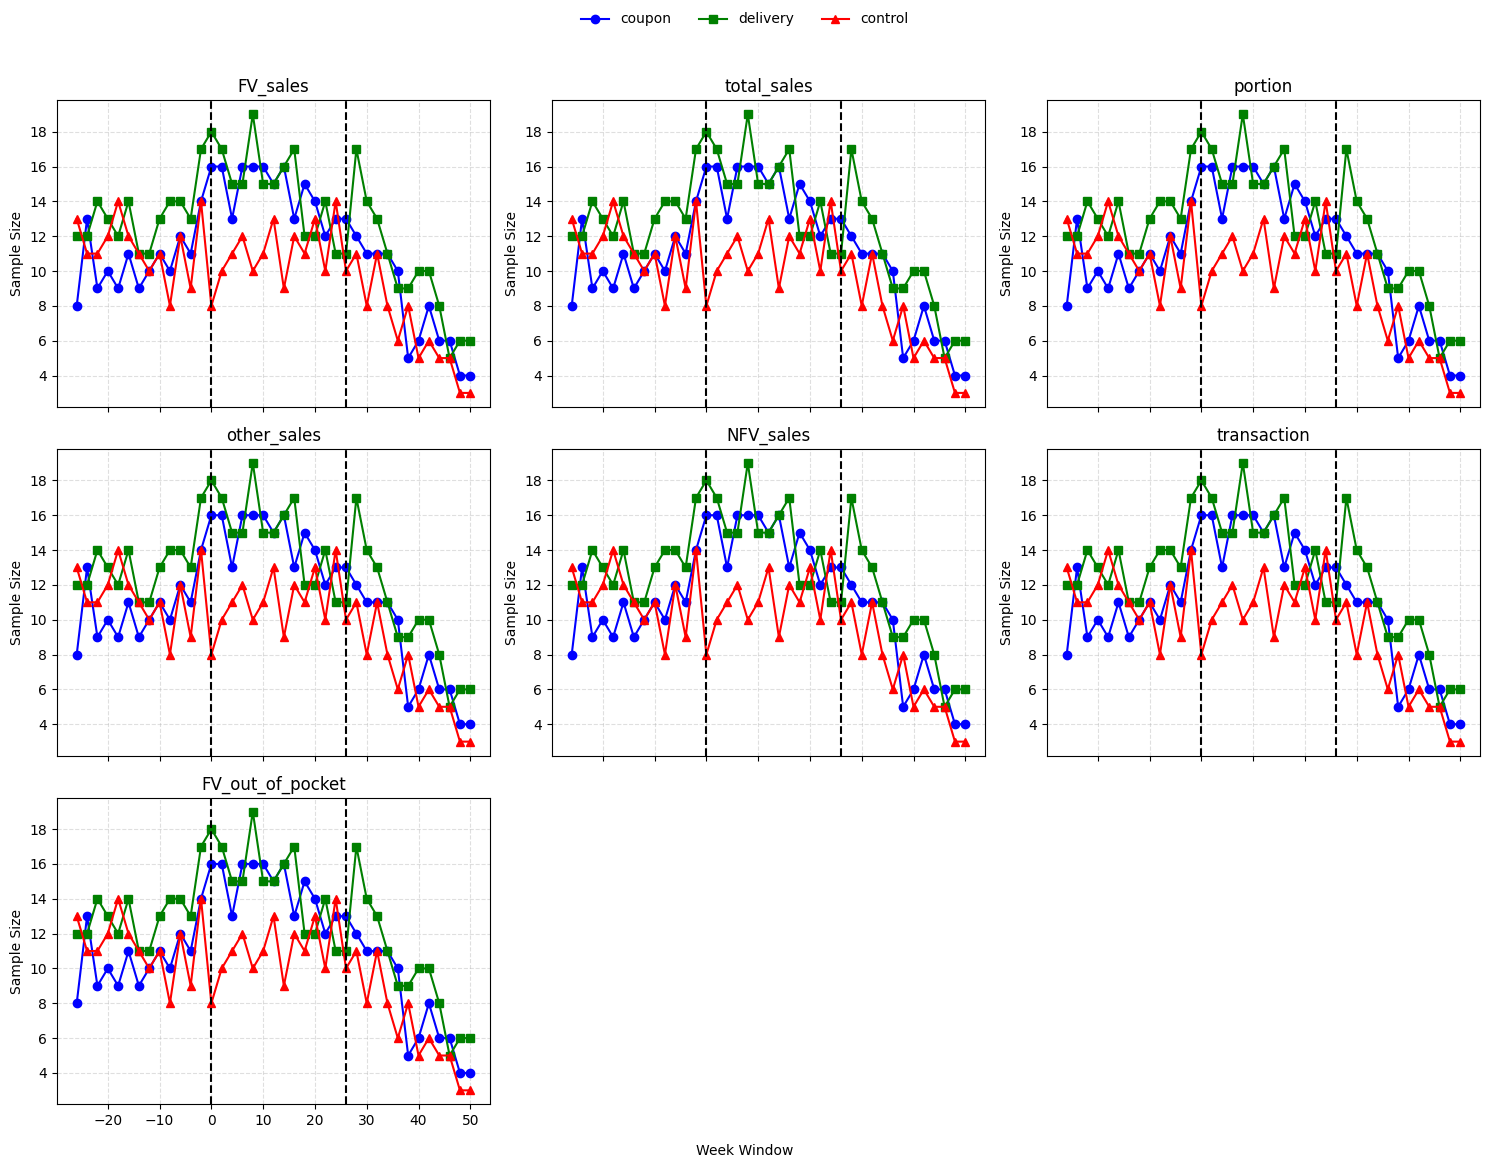

In [35]:
import matplotlib.pyplot as plt

# Outcomes to plot
outcomes = ['FV_sales', 'total_sales', 'portion', 'other_sales',
    'NFV_sales', 'transaction', 'FV_out_of_pocket' ]

# Group data (already prepared)
groups = {
    'coupon': (coupon_counts, 'blue', 'o'),
    'delivery': (delivery_counts, 'green', 's'),
    'control': (control_counts, 'red', '^')
}

# Create subplots: rows × cols grid
n_outcomes = len(outcomes)
n_cols = 3
n_rows = (n_outcomes + n_cols - 1) // n_cols  # round up

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows), sharex=True)

# Flatten axes for easy looping
axes = axes.flatten()

for i, outcome in enumerate(outcomes):
    ax = axes[i]

    # Plot all groups
    for label, (df, color, marker) in groups.items():
        ax.plot(df['week_bin'], df[outcome], 
                color=color, marker=marker, label=label)

    # Vertical lines for phase separation
    ax.axvline(x=0, color='black', linestyle='--')
    ax.axvline(x=26, color='black', linestyle='--')

    # Labels and title
    ax.set_title(outcome, fontsize=12)
    ax.set_ylabel("Sample Size")
    ax.grid(True, linestyle='--', alpha=0.4)

# Remove unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Shared X label
fig.text(0.5, 0.04, 'Week Window', ha='center')

# Add legend outside
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3, frameon=False)

# Layout and save
fig.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.savefig("all_outcomes_sample_size_change.png", dpi=300)
plt.show()
